In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# 讀取酒類資料集
digits = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

# 建立模型
reg = GradientBoostingRegressor(random_state=7)


In [3]:
# 先看看使用預設參數得到的結果，約為 0.14 的 MSE
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(metrics.mean_squared_error(y_test, y_pred))

0.14672894294872418


In [4]:
n_estimators = [50, 100, 150]
max_depth = [1, 3, 5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
param_grid

{'n_estimators': [50, 100, 150], 'max_depth': [1, 3, 5]}

In [5]:
# 設定要訓練的超參數組合
n_estimators = [50, 100, 150]
max_depth = [1, 3, 5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(reg, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

# 預設會跑 3-fold cross-validadtion，總共 9 種參數組合，總共要 train 27 次模型

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\tony8\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.9s finished
C:\Users\tony8\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [6]:
# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: -0.080314 using {'max_depth': 1, 'n_estimators': 150}


In [7]:
grid_result.best_params_

{'max_depth': 1, 'n_estimators': 150}

In [8]:
# 使用最佳參數重新建立模型
reg_bestparam = GradientBoostingRegressor(max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'])

# 訓練模型
reg_bestparam.fit(x_train, y_train)

# 預測測試集
y_pred = reg_bestparam.predict(x_test)

In [9]:
# 調整參數後約可降至 0.05 的 MSE
print(metrics.mean_squared_error(y_test, y_pred))

0.05207725857654407


## [作業重點]
了解如何使用 Sklearn 中的 hyper-parameter search 找出最佳的超參數

### 作業
請使用不同的資料集，並使用 hyper-parameter search 的方式，看能不能找出最佳的超參數組合

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

digits = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=4)

clf = GradientBoostingClassifier(random_state=4)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [11]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9688888888888889


In [12]:
from sklearn.model_selection import StratifiedKFold

parameters = {
    'loss':['deviance'],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators':[20, 50, 100],
    'max_depth':[1, 3, 5, 10]
}

folder = StratifiedKFold(n_splits=3, shuffle=True)

grid_search = GridSearchCV(clf, parameters, cv=folder, scoring='accuracy', n_jobs=-1, verbose=1)

grid_result = grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   33.0s finished
C:\Users\tony8\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [13]:
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.953229 using {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 50}


In [14]:
y_pred = grid_result.best_estimator_.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9711111111111111


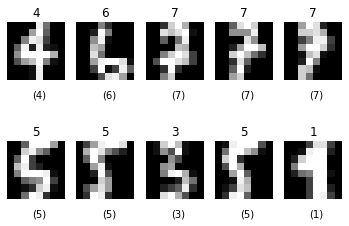

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

num = 10
indx = np.random.choice(len(x_test), num, replace=False)
for i in range(num):
    plt.subplot(num/5, 5, i+1)
    plt.title(y_test[indx[i]])
    plt.text(x=3, y=10, s='(' + str(y_pred[indx[i]]) + ')')
    plt.imshow(x_test[indx[i]].reshape(8,8), cmap='gray')
    plt.axis('off')
    #plt.tight_layout()